# Intial Value Poblem
The general form of the population growth differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 4) $$
with the initial condition
$$x(0)=1$$
For N=4
with the analytic (exact) solution
$$ y= 2e^{-t}+t+1$$

# Taylor Solution

$$ f(t,y)=t-y $$
$$ f'(t,y)=1-y'=1-t+y $$

$$T^1(t_i,w,i)=f(t_i,w_i)=t_i-w_i$$

$$T^2(t_i,w,i)=f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)=t_i-w_i+\frac{h}{2}(1-t_i+w_i)$$

The first order Taylor difference equation is
$$w_{i+1}=w_i+h(t_i-w_i) $$
The second order Taylor difference equation is
$$w_{i+1}=w_i+h(t_i-w_i+\frac{h}{2}(1-t_i+w_i)) $$

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


In [21]:
def Second_order_taylor(N,IC):
    x_end=4
    x_start=0
    
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    N=N+1;
    Numerical_Solution=np.zeros(N)
    Numerical_Solution_first=np.zeros(N)
    t=np.zeros(N)
    Analytic_Solution=np.zeros(N)
    Upper_bound=np.zeros(N)
    
    t[0]=x_start
    Numerical_Solution[0]=INTITIAL_CONDITION
    Numerical_Solution_first[0]=INTITIAL_CONDITION
    Analytic_Solution[0]=INTITIAL_CONDITION
    for i in range (1,N):
        Numerical_Solution_first[i]=Numerical_Solution_first[i-1]+h*(t[i-1]-Numerical_Solution_first[i-1])
        Numerical_Solution[i]=Numerical_Solution[i-1]+h*(t[i-1]-Numerical_Solution[i-1]+h/2*(1-t[i-1]+Numerical_Solution[i-1]))
        t[i]=t[i-1]+h
        Analytic_Solution[i]=2*math.exp(-t[i])+t[i]-1
    

    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,3,1)
    plt.plot(t,Numerical_Solution,color='blue',label='Second Order')
    plt.plot(t,Numerical_Solution_first,color='red',label='First Order')
    plt.legend(loc='best')
    plt.title('Numerical Solution h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,3,2)
    plt.plot(t,Analytic_Solution,color='blue')
    plt.title('Analytic Solution')

    #ax.legend(loc='best')
    ax = fig.add_subplot(1,3,3)
    plt.plot(t,np.abs(Analytic_Solution-Numerical_Solution),color='blue',label='Second Order Error')
    plt.plot(t,np.abs(Analytic_Solution-Numerical_Solution_first),color='red',label='First Order Error')
    plt.title('Error')
    plt.legend(loc='best')
    # --- title, explanatory text and save
    
   
    # --- title, explanatory text and save
    fig.suptitle(r"$y'=y-t$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)    
    print(Analytic_Solution)
    print(Numerical_Solution)

[ 1.          0.90967484  0.83746151  0.78163644  0.74064009  0.71306132
  0.69762327  0.69317061  0.69865793  0.71313932  0.73575888  0.76574217
  0.80238842  0.84506359  0.89319393  0.94626032  1.00379304  1.06536705
  1.13059778  1.19913724  1.27067057  1.34491286  1.42160632  1.50051769
  1.58143591  1.66417     1.74854716  1.83441103  1.92162013  2.01004644
  2.09957414  2.1900984   2.28152441  2.37376633  2.46674654  2.56039477
  2.65464744  2.74944705  2.84474154  2.94048382  3.03663128]
[ 1.          0.91        0.83805     0.78243525  0.7416039   0.71415153
  0.69880714  0.69442046  0.69995051  0.71445522  0.73708197  0.76705918
  0.80368856  0.84633815  0.89443602  0.9474646   1.00495546  1.06648469
  1.13166865  1.20016013  1.27164492  1.34583865  1.42248398  1.501348
  1.58221994  1.66490904  1.74924269  1.83506463  1.92223349  2.01062131
  2.10011228  2.19060162  2.28199446  2.37420499  2.46715552  2.56077574
  2.65500205  2.74977685  2.84504805  2.94076849  3.03689548]


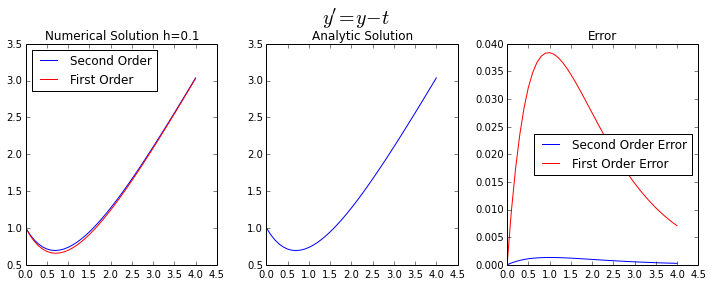

In [22]:
Second_order_taylor(40,1)